# Apply Convolutional Neural Network Algorithm for an Image Classification Task

In [1]:
!pip install tensorflow_datasets

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

2024-04-09 08:23:59.008099: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

2024-04-09 08:24:08.126253: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(train_images, train_labels, epochs=1,
                    validation_data=(test_images, test_labels))

1563/1563 [==============================] - 377s 240ms/step - loss: 1.5462 - accuracy: 0.4359 - val_loss: 1.2929 - val_accuracy: 0.5371


In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 14s 45ms/step - loss: 1.2929 - accuracy: 0.5371
Test accuracy: 0.5371000170707703


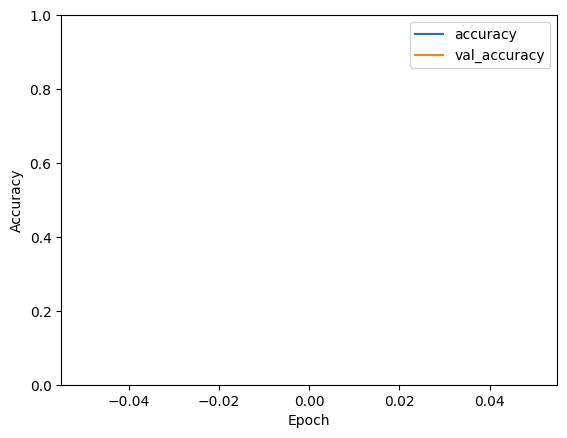

In [8]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [10]:
test_predictions = np.argmax(model.predict(test_images), axis=1)
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(cm)

313/313 [==============================] - 14s 44ms/step
Confusion Matrix:
[[571  55 112  33  24  39  22  28  64  52]
 [ 28 670  11  24   5  26  18  38  29 151]
 [ 53   7 308  61 121 259  96  71  11  13]
 [  9   8  52 294  48 427  94  51   6  11]
 [ 21   8 108  69 361 158 126 140   5   4]
 [  8   4  42 110  30 694  36  67   3   6]
 [  2   5  32 105  64  75 671  25   3  18]
 [ 12   4  20  38  40 192  20 657   2  15]
 [185  81  51  35   7  26  15  16 510  74]
 [ 35 127  26  24   2  39  34  46  32 635]]


<Axes: >

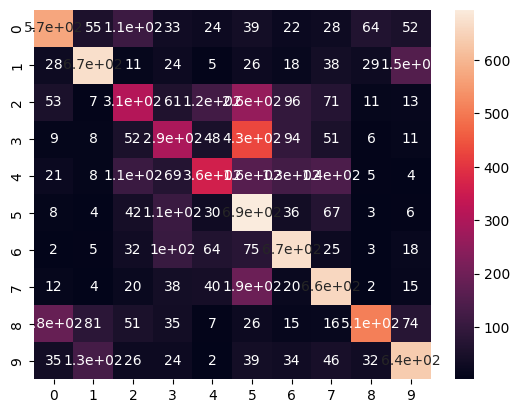

In [11]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [12]:
from sklearn.metrics import classification_report

# Generate predictions
test_predictions = np.argmax(model.predict(test_images), axis=1)

# Generate classification report
report = classification_report(test_labels, test_predictions)

# Print classification report
print("Classification Report:")
print(report)


313/313 [==============================] - 12s 37ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.57      0.59      1000
           1       0.69      0.67      0.68      1000
           2       0.40      0.31      0.35      1000
           3       0.37      0.29      0.33      1000
           4       0.51      0.36      0.42      1000
           5       0.36      0.69      0.47      1000
           6       0.59      0.67      0.63      1000
           7       0.58      0.66      0.61      1000
           8       0.77      0.51      0.61      1000
           9       0.65      0.64      0.64      1000

    accuracy                           0.54     10000
   macro avg       0.55      0.54      0.53     10000
weighted avg       0.55      0.54      0.53     10000

